<a href="https://colab.research.google.com/github/GhazalehKeyvani/Data-Science-Exercises/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


The Perceptron


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [ ]:
print(y_pred)

[ True False]


The Multilayer Perceptron and Backpropagation

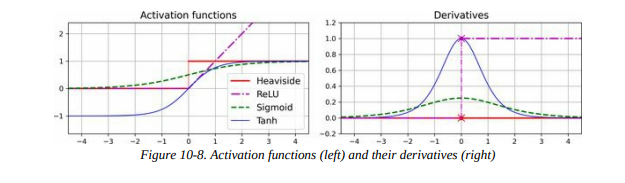

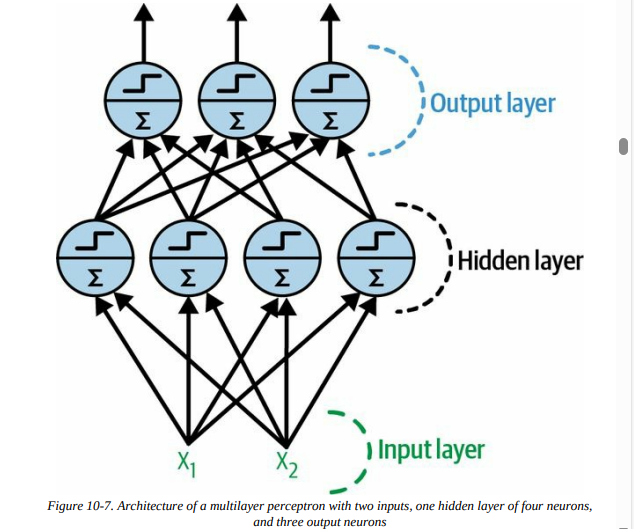

Regression MLPs


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full, random_state=42)


mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred) # about 0.505

![image.png](
  
)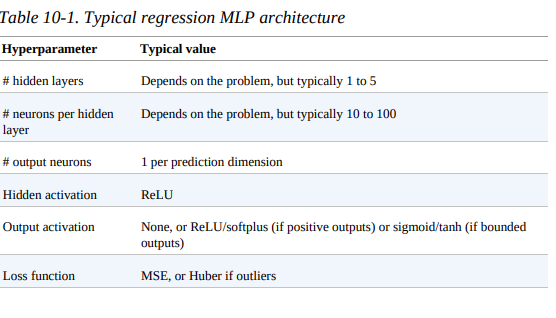

Classification MLPs

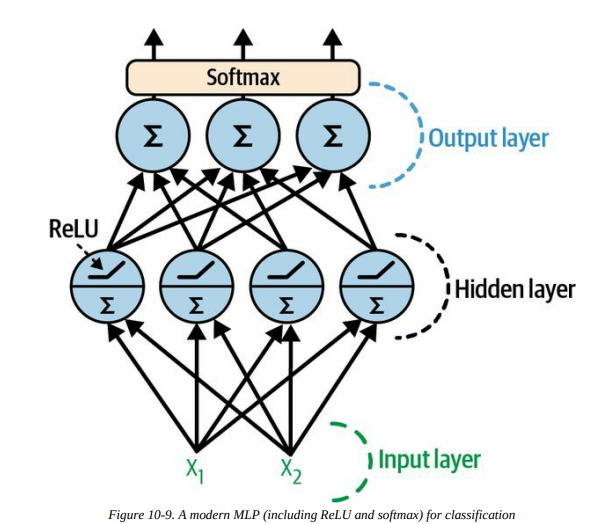

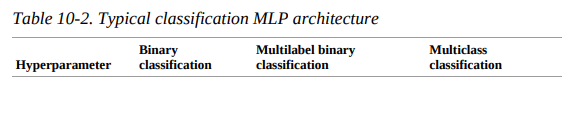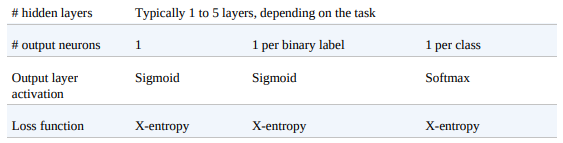

Building an Image Classifier Using the Sequential API


Using Keras to load the dataset


Implementing MLPs with Keras

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape


(55000, 28, 28)

In [ ]:

X_train.dtype

dtype('uint8')

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
class_names[y_train[0]]

'Ankle boot'

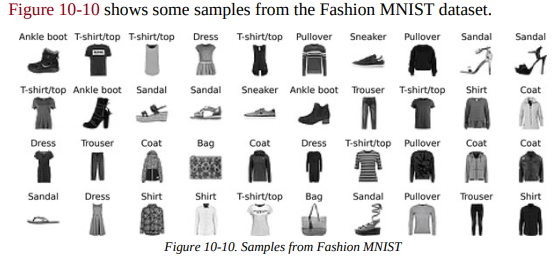

Creating the model using the sequential API


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()

# model.add() is used to add layers to the Sequential model.
# tf.keras.layers.Input() defines the input layer of the model.
# shape=[28, 28] specifies that the input data will be 2-dimensional
#  images with a width and height of 28 pixels each. For example,
#  this could be used for MNIST handwritten digit images.

model.add(tf.keras.layers.Input(shape=[28, 28]))

# This line adds a Flatten layer to the model.
# The Flatten layer converts the 2-dimensional input image (28x28 pixels) into a 1-dimensional vector (784 elements).
# This is necessary because the subsequent Dense layers expect 1-dimensional input.

model.add(tf.keras.layers.Flatten())
# 300 neurons
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers


[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [ ]:
hidden1 = model.layers[1]


In [ ]:
hidden1.name


'dense_3'

In [ ]:
model.get_layer('dense_3') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02856155, -0.04515114, -0.01384564, ..., -0.04642083,
         0.00804495,  0.02481226],
       [-0.06167023,  0.01867077, -0.02071011, ...,  0.03681866,
        -0.01158468,  0.00376078],
       [ 0.05085862,  0.02121668, -0.03663369, ...,  0.05350304,
         0.00388021, -0.03628383],
       ...,
       [-0.04170625, -0.00088295,  0.06205097, ...,  0.04452026,
        -0.03537625, -0.0649454 ],
       [-0.03642784, -0.03188581,  0.06869735, ..., -0.01468074,
         0.06177881, -0.06610538],
       [-0.02768458,  0.03959369,  0.0223713 , ..., -0.03751946,
        -0.0634198 , -0.00012112]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

Compiling the model


We use the
"sparse_categorical_crossentropy" loss because we have sparse labels (i.e.,
for each instance, there is just a target class index, from 0 to 9 in this case),
and the classes are exclusive. If instead we had one target probability per
class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0.,
0., 0., 0.] to represent class 3), then we would need to use the
"categorical_crossentropy" loss instead. If we were doing binary
classification or multilabel binary classification, then we would use the
"sigmoid" activation function in the output layer instead of the "softmax"
activation function, and we would use the "binary_crossentropy" loss.

In [ ]:
#  configuring the learning process
model.compile(loss="sparse_categorical_crossentropy",

# "sparse_categorical_crossentropy": This specific loss function is chosen because you are
#  dealing with a multi-class classification problem (e.g., classifying handwritten digits 0-9)
#   where your target labels are integers representing the class index (e.g., '0', '1', '2', etc.). The term "sparse"
#  indicates that you are using these integer labels directly, rather than one-hot encoded vectors.

optimizer="sgd",
# optimizer: This argument determines the algorithm used to update
# the model's weights based on the calculated loss.
#  Optimizers are crucial for efficient and effective learning.
# "sgd": This stands for Stochastic Gradient Descent, a widely
# used optimization algorithm. It iteratively adjusts the model's
# weights in the direction that reduces the loss.

metrics=["accuracy"])

# metrics: This argument defines the metrics used to evaluate the model's
#  performance during and after training. These metrics don't directly influence
#   the learning process but provide insights into how well your model is doing.
# ["accuracy"]: Accuracy is a common metric for classification, measuring the
#  percentage of correctly classified instances. In this case, the model will
#   track its accuracy during training.

**Metrics**

Metrics are used to evaluate the performance of your model. They are different from loss functions because they are not used to train the model. Instead, they are used to monitor how well the model is doing on unseen data.

Here are some common types of metrics:

Accuracy:

 This is the most common metric for classification problems. It measures the percentage of correctly classified instances.

Precision:

 This metric measures the proportion of correctly predicted positive instances among all instances predicted as positive. It is a good metric to use when the cost of false positives is high.

Recall:

 This metric measures the proportion of correctly predicted positive instances among all actual positive instances. It is a good metric to use when the cost of false negatives is high.

F1-score:

 This is a harmonic mean of precision and recall. It is a good metric to use when you want to balance precision and recall.

AUC (Area Under the Curve):

 This metric is used for binary classification problems and measures the ability of the model to distinguish between positive and negative classes. A higher AUC score indicates better performance.

**Loss Functions**


Loss functions are used to measure the error of the model during training. The goal of training is to minimize the loss function.

Here are some common types of loss functions:

Mean Squared Error (MSE):

 This is a common loss function for regression problems. It measures the average squared difference between the predicted and actual values.

Binary Cross-Entropy:

 This is a common loss function for binary classification problems. It measures the difference between the predicted probability and the actual label.

Categorical Cross-Entropy:

 This is a common loss function for multi-class classification problems where each instance belongs to only one class. It measures the difference between the predicted probability distribution and the actual label.

Sparse Categorical Cross-Entropy:

 This is similar to categorical cross-entropy, but it is used when the target labels are integers representing the class index, rather than one-hot encoded vectors.

Hinge Loss: This loss function is used for maximum-margin classification, such as in Support Vector Machines (SVMs).

**Optimizers**

Optimizers are algorithms used to update the weights of the model during training. They aim to find the weights that minimize the loss function.

Here are some common types of optimizers:

Stochastic Gradient Descent (SGD):

 This is a widely used optimization algorithm. It iteratively adjusts the model's weights in the direction that reduces the loss.

Adam:

 This is another popular optimization algorithm that is often faster and more efficient than SGD. It adapts the learning rate for each parameter based on the historical gradients.

RMSprop:

 This optimizer is similar to Adam but uses a different method to adapt the learning rate.

Adagrad:

 This optimizer is designed to perform well on sparse data. It adapts the learning rate for each parameter based on the frequency of updates.


Training and evaluating the model

In [ ]:
# a function that trains the model.
# The results of the training process are stored in the history


history = model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))
# By using a validation set, we can monitor how well the model
#  generalizes to unseen data and potentially detect overfitting

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch

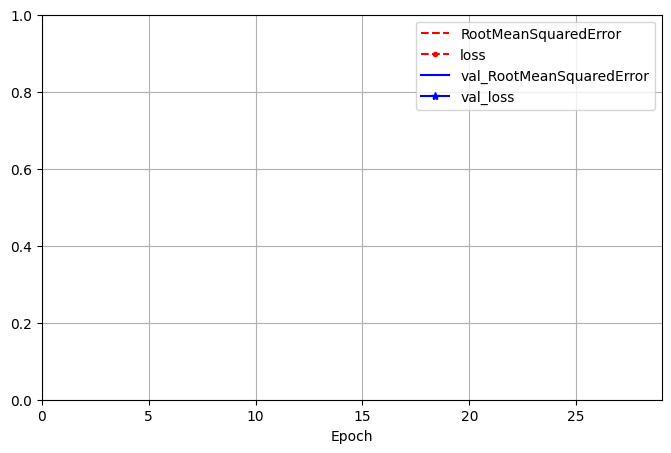

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

Learning curves: the mean training loss and accuracy measured over each epoch, and
the mean validation loss and accuracy measured at the end of each epoch


In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: nan


[nan, 0.10000000149011612]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [ ]:
#504

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([0, 0, 0])

In [ ]:
np.array(class_names)[y_pred]

array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
#Building the Model
model = tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

#Compiling the Model
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Adapting the Normalization Layer and Training the Model
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

# Evaluating and Making Predictions
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - RootMeanSquaredError: 3.0670 - loss: 9.4884 - val_RootMeanSquaredError: 2.8995 - val_loss: 8.4072
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - RootMeanSquaredError: 2.8827 - loss: 8.3098 - val_RootMeanSquaredError: 2.8976 - val_loss: 8.3961
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - RootMeanSquaredError: 2.8788 - loss: 8.2878 - val_RootMeanSquaredError: 2.8981 - val_loss: 8.3991
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - RootMeanSquaredError: 2.8773 - loss: 8.2790 - val_RootMeanSquaredError: 2.8978 - val_loss: 8.3972
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - RootMeanSquaredError: 2.8764 - loss: 8.2736 - val_RootMeanSquaredError: 2.8967 - val_loss: 8.3909
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - RootMeanSquaredError: 2.8755 - loss: 8.2687 - val_RootMeanSquaredError: 2.8966 - val_loss: 8.3902
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - RootMeanSquar

In [ ]:
# This line creates a "Normalization" layer. This layer is important for preprocessing
#  your input data. It helps by adjusting the values of your features so they have
#   a mean of 0 and a standard deviation of 1.
#  This can often lead to faster and more stable training of your neural network

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

# This creates a layer that will be used to combine (concatenate) the outputs from other layers.

concat = concat_layer([normalized, hidden2])
output = output_layer(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:

# This code defines a wide and deep model. The wide path processes some features directly
#  while the deep path processes other features through a series of hidden layers.
#   These two paths are then combined, and the combined information is used to make a prediction.
#    This architecture can be beneficial for tasks where both memorization (wide path) and generalization
#     (deep path) are important.
#  I hope this provides a clear explanation of the code!

input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[[4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.44],
        [4.46],
        [4.48],
        [4.48],
        [4.49],
        [4.48],
        [4.48],
        [4.48],
        [4.48],
        [4.47],
        [4.48],
        [4.47],
        [4.48],
        [4.47],
        [4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.46],
        [4.46]],

       [[4.45],
        [4.35],
        [4.37],
        [4.39],
        [4.37],
        [4.38],
        [4.28],
        [4.37],
        [4.29],
        [4.42],
        [4.37],
        [4.37],
        [4.36],
        [4.38],
        [4.4 ],
        [4.39],
        [4.38],
        [4.38],
        [4.38],
        [4.38],
        [4.38],
        [4.37],
        [4.37],
        [4.36],
        [4.37],
        [4.44],
        [4.43],
        [4.39]],

       [[4.38],
        [4.36],
        [4.36],
        [4.36],
        [4.36],
        [4.36],
    

Using the model to make prediction

In [ ]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

np.array(class_names)[y_pred]

array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

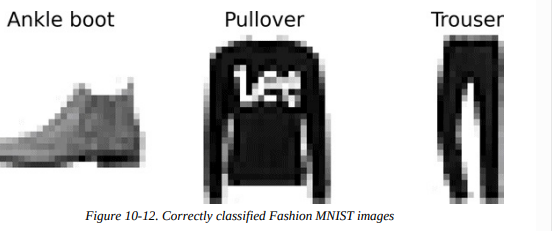

Building a Regression MLP Using the Sequential API

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
            validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - RootMeanSquaredError: 3.0501 - loss: 9.3754 - val_RootMeanSquaredError: 2.9003 - val_loss: 8.4117
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - RootMeanSquaredError: 2.8827 - loss: 8.3102 - val_RootMeanSquaredError: 2.8989 - val_loss: 8.4034
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - RootMeanSquaredError: 2.8788 - loss: 8.2877 - val_RootMeanSquaredError: 2.9003 - val_loss: 8.4116
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - RootMeanSquaredError: 2.8771 - loss: 8.2776 - val_RootMeanSquaredError: 2.8972 - val_loss: 8.3936
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - RootMeanSquaredError: 2.8759 - loss: 8.2709 - val_RootMeanSquaredError: 2.8959 - val_loss: 8.3860
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - RootMeanSquaredError: 2.8748 - loss: 8.2648 - val_RootMeanSquaredError: 2.8938 - val_loss: 8.3738
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - RootMeanSquar

Building Complex Models Using the Functional API

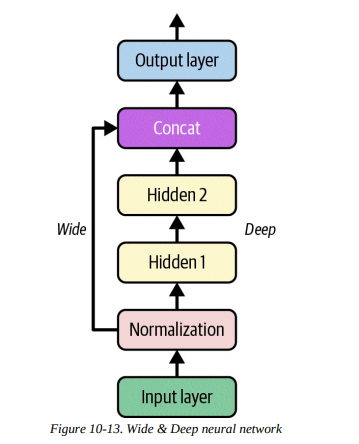

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

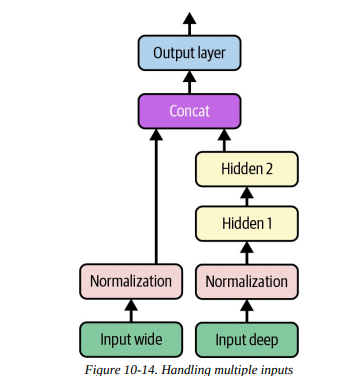

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
            validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(5,), Received: value.shape=(5, 28). Target variable: <KerasVariable shape=(5,), dtype=float32, path=normalization_8/mean>

In [ ]:
[...] # Same as above, up to the main output layer
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                outputs=[output, aux_output])


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
    metrics=["RootMeanSquaredError"])


In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
  )


ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(5,), Received: value.shape=(5, 28). Target variable: <KerasVariable shape=(5,), dtype=float32, path=normalization_8/mean>

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results


ValueError: Input 1 of layer "functional_12" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 26, 28)

In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


ValueError: Input 1 of layer "functional_12" is incompatible with the layer: expected shape=(None, 6), found shape=(3, 26, 28)

In [ ]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))


ValueError: Input 1 of layer "functional_12" is incompatible with the layer: expected shape=(None, 6), found shape=(3, 26, 28)

In [ ]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # needed to support naming the model
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)
  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return output, aux_output
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

Saving and Restoring a Model


In [ ]:
model.save("my_keras_model", save_format="tf")

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
model = tf.keras.models.load_model("my_keras_model")

y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Using Callbacks


In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                            save_weights_only=True)
history = model.fit([...], callbacks=[checkpoint_cb])

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights=True)
history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])


In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio = logs["val_loss"] / logs["loss"]
    print(f"Epoch={epoch}, val/train={ratio:.2f}")


Using TensorBoard for Visualization

In [ ]:
%pip install -q -U tensorboard-plugin-profile

In [ ]:
from pathlib import Path
from time import strftime
def get_run_logdir(root_logdir="my_logs"):
  return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir = get_run_logdir() # e.g., my_logs/run_2022_08_01_17_25_59


In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                            profile_batch=(100, 200))
history = model.fit([...], callbacks=[tensorboard_cb])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

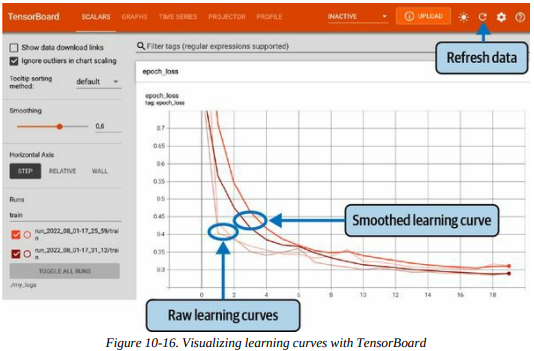

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
    data = (np.random.randn(100) + 2) * step / 100 # gets larger
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
    tf.summary.image("my_images", images, step=step)
    texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
    tf.summary.text("my_text", texts, step=step)
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
    audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
    tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


Fine-Tuning Neural Network Hyperparameters


In [ ]:
import keras_tuner as kt
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
  sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
  metrics=["accuracy"])
  return model


ModuleNotFoundError: No module named 'keras_tuner'

In [ ]:
random_search_tuner = kt.RandomSearch(
  build_model, objective="val_accuracy", max_trials=5, overwrite=True,
  directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
            validation_data=(X_valid, y_valid))


NameError: name 'kt' is not defined

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # best hyperparameter values


In [ ]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

In [ ]:
class MyClassificationHyperModel(kt.HyperModel):
  def build(self, hp):
    return build_model(hp)
  def fit(self, hp, model, X, y, **kwargs):
    if hp.Boolean("normalize"):
      norm_layer = tf.keras.layers.Normalization()
      X = norm_layer(X)
    return model.fit(X, y, **kwargs)


In [ ]:
hyperband_tuner = kt.Hyperband(
MyClassificationHyperModel(), objective="val_accuracy", seed=42,
max_epochs=10, factor=3, hyperband_iterations=2,
overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [ ]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid),
callbacks=[early_stopping_cb, tensorboard_cb])

In [ ]:
bayesian_opt_tuner = kt.BayesianOptimization(
MyClassificationHyperModel(), objective="val_accuracy", seed=42,
max_trials=10, alpha=1e-4, beta=2.6,
overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search([...])


NameError: name 'kt' is not defined